# Redução da dimensionalidade com PCA

O PCA localiza um novo conjunto de dimensões (ou um conjunto de base de visualizações) de modo que todas as dimensões sejam ortogonais (e, portanto, linearmente independentes) e classificadas de acordo com a variação dos dados ao longo delas. Isso significa que o eixo principal mais importante ocorre primeiro. (mais importante = mais variação/dados mais espalhados)

Como funciona o PCA:

* Calcule a matriz de covariância X dos pontos de dados.
* Calcule os autovetores e os autovalores correspondentes.
* Classifique os autovetores de acordo com seus autovalores em ordem decrescente.
* Escolha os primeiros k autovetores e essas serão as novas k dimensões.
* Transforme os pontos de dados dimensionais n originais em dimensões k.

### 1. Importe todas as bibliotecas

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale

### 2. Carregando dados

Carregue o conjunto de dados iris dataset 

In [99]:
# load iris dataset
iris_data = datasets.load_iris()

In [100]:
X = iris_data['data']
y = iris_data['target']

descricao = iris_data['DESCR']
print(descricao)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [101]:
print(iris_data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### 3. Rode o PCA

Padronize o conjunto de dados antes do PCA.

Importe o PCA de sklearn.decomposition.

Escolha o número de componentes principais.

Se não adicionarmos nada dentro de PCA(), os valores usados serão default. Ou seja, vai calcular os autovetores de todas as dimensões. 

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [102]:
from sklearn.decomposition import PCA

X = scale(iris.data)
y = iris.target

pca = decomposition.PCA()
X = pca.fit_transform(X)

### 4. Calcule a matriz de covariância

In [103]:
pca.get_covariance()

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

### 5. Calcule os autovalores e autovetores

In [104]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

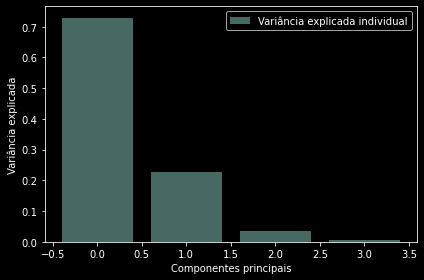

In [105]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='Variância explicada individual')
    plt.ylabel('Variância explicada')
    plt.xlabel('Componentes principais')
    plt.legend(loc='best')
    plt.tight_layout()

### 6. Escolha os componentes e forme o vetor de características

Os loadings são os coeficientes da combinação linear das variáveis originais a partir das quais os componentes principais (PCs) são construídos.

In [106]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=iris_data.feature_names)
loadings

,PC1,PC2,PC3,PC4
sepal length (cm),0.521066,0.377418,-0.719566,-0.261286
sepal width (cm),-0.269347,0.923296,0.244382,0.123510
petal length (cm),0.580413,0.024492,0.142126,0.801449
petal width (cm),0.564857,0.066942,0.634273,-0.523597


### Porém, e se fossemos reduzir para 2 componentes principais


In [111]:
# load iris dataset
iris = datasets.load_iris()
 
X = scale(iris.data) #normalizar os dados
y = iris.target



# apply PCA
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(X)
print(X.shape)

(150, 2)


In [108]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=iris.feature_names)
loadings

,PC1,PC2
sepal length (cm),0.521066,0.377418
sepal width (cm),-0.269347,0.923296
petal length (cm),0.580413,0.024492
petal width (cm),0.564857,0.066942


In [109]:
# check how much variance is explained by each principal component
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


# Atividade

Selecione uma base de dados do pacote sklearn
https://scikit-learn.org/stable/datasets.html 
    
Explore os dados e aplique a PCA. Na sequência responda:
    
a) Quantas características tem a base de dados?

b) Quantas amostras?

c) Quantos componentes principais podem ser utilizados para formar a nova base de dados?

d) Qual o nome das características que serão selecionadas conforme as CP?

e) Qual a variância explicada do 1CP e 2CP?

f) Faça uma pesquisa para encontrar outros métodos de seleção de características, excluindo o PCA. Quais os algoritmos mais populares? Apresente a descrição de pelo menos 2. 